# ConceptQuery Demo

In [1]:
from concept_query import GraphSearch
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import time

In [2]:
# Create graph search client
client = GraphSearch(neo4j_uri="bolt://34.74.158.108:7687", 
                     neo4j_user='neo4j', neo4j_password='password', neo4j_encrypted=True)

## Get networkx graph

In [4]:
start = time.time()
query = ['tensorflow']
gr = client.get_result(*query, n_nodes=50)
print(f'Elapsed time: {time.time() - start} seconds')

Elapsed time: 0.2448279857635498 seconds


In [5]:
print(len(gr))

50


In [6]:
scores = []
for node, attr in gr.nodes(data=True):
    scores.append((node, attr['weight']))

In [7]:
sorted_nodes = sorted(scores, key=lambda x: x[1], reverse=True)
for node, weight in sorted_nodes:
    print(node, weight)

deep-learning 3.4629579924682434
python 3.3195154324245504
software 3.0412907798951374
network 2.993415507640905
neural-network 2.7887638567640063
model 2.4961607182499406
google 2.491951549289918
machine-learning 1.9880037982748064
keras 1.5494056988736706
application 1.544346618677599
silicon 1.13354203569695
cpu 1.1159908899619533
cloud 1.0232858270109202
tensor 1.019919364718962
tensorflow 1.0
community 0.9806820631377564
code 0.8914019790952712
gpus 0.826991507838489
ecosystem 0.7869411921250585
cnn 0.7779163160157005
gpu 0.7627759287613377
server 0.688784548965467
utensor 0.6372551038659798
example 0.6325624197718694
device 0.6312087146360484
algorithm 0.6136895555950934
tensorflow-processing-unit 0.5526696974229653
dataset 0.5477189290535341
desktop 0.500934061698781
question 0.4889524674212466
source 0.48296750583337855
training 0.48148409139883364
tensorboard 0.47294696151842075
topic 0.45916817542644606
form 0.4573948040592811
regression 0.4505301414746943
flag 0.439673027911

## Draw Graph

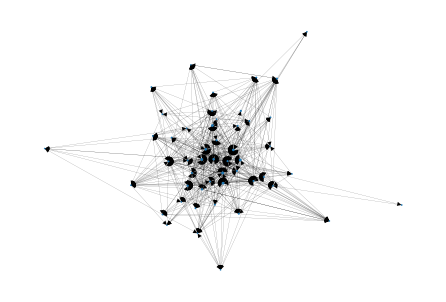

In [16]:
nx.draw_spring(gr, width=0.1, node_size=[gr.nodes[n]['weight'] for n in gr.nodes])

### Prune Graph

Repeatedly remove nodes that don't have outbound edges.

In [17]:
G = client.get_result(*query, prune=True)

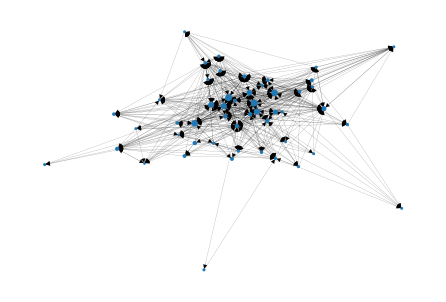

In [18]:
nx.draw_spring(G, width=0.1, node_size=[gr.nodes[n]['weight']*10 for n in G.nodes])

In [20]:
len(G.nodes)

50

## Pickle Graphs

In [12]:
# Write
with open('tensorflow-networkx','wb') as f:
    pickle.dump(G, f)

In [13]:
# Read
with open('tensorflow-networkx','rb') as f:
    gr = pickle.load(f)

In [1]:
from concept_query.utils import distribute, ProxyRetriever, urlopen
from concept_query import GoogleSearch

import urllib
import time
from lxml.html import fromstring
import multiprocessing
from itertools import cycle
from lxml import etree

In [2]:
g = GoogleSearch(engine='google')

Refreshing proxies...


In [6]:
data = g.search('tensorflow', full=True)

google
google


In [12]:
data[1]['caption']

"TensorFlow  was originally developed by researchers and engineers working on the Google Brain team within Google's Machine Intelligence Research\xa0..."

In [5]:
text = urlopen('https://www.google.com/search?q=tensorflow')

In [6]:
parser = fromstring(text)
searchResults = []
url_set = set()

In [5]:
full = True
for result in parser.xpath('//li[@class="b_algo"]'):
    # pprint(etree.tostring(result, pretty_print=True))
    try:
        href = result.xpath('h2//a')[0].get('href')
        if href not in url_set:
            if full:
                item = {
                    'url' : href,
                    'title' : ' '.join(result.xpath('h2/a//text()')),
                    'caption' : ' '.join(result.xpath('div[@class="b_caption"]//p//text()'))
                }
            else:
                item = href
            searchResults.append(item)
            url_set.add(href)
    except IndexError:
        pass

In [6]:
searchResults

[{'url': 'https://www.tensorflow.org/',
  'title': 'TensorFlow',
  'caption': 'TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.'},
 {'url': 'https://www.tensorflow.org/install/',
  'title': 'Install TensorFlow 2',
  'caption': 'The TensorFlow Docker images are already configured to run TensorFlow. A Docker container runs in a virtual environment and is the easiest way to set up GPU support . docker pull tensorflow/tensorflow:latest-py3 # Download latest stable image. docker run -it -p 8888:8888 tensorflow/tensorflow:latest-py3-jupyter # Start Jupyter server.'},
 {'url': 'https://github.com/tensorflow/tensorflow',
  'title': 'GitHub - tensorflow/tensorflow: An Open Source Machine ...',
  'caption': '29 rows \xa0·  Feb 28, 2020 \xa0· GitHub is home to over 40 milli

In [10]:
result = parser.xpath('//div[@class="rc"]')[0]
href = result.xpath('div[@class="r"]/a')[0].get('href')

In [11]:
href

'https://www.tensorflow.org/'

In [29]:
result.xpath('h2/a//text()')

['TensorFlow']

In [22]:
etree.tostring(result.xpath('div[@class="s"]//span[@class="st"]')[0])

b'<span class="st">An end-to-end open source machine learning platform for everyone. Discover <em>TensorFlow\'s</em> flexible ecosystem of tools, libraries and community resources.</span>'

In [23]:
result.xpath('div[@class="s"]//span[@class="st"]//text()')

['An end-to-end open source machine learning platform for everyone. Discover ',
 "TensorFlow's",
 ' flexible ecosystem of tools, libraries and community resources.']

In [25]:
# result.xpath('div[@class="b_caption"]//p//text()')
result.xpath('div[@class="r"]/a/h3//text()')

['TensorFlow']

In [11]:
try:
    raise Exception("hello")
except Exception as e:
    print(str(e))
    print(str(e) == "hello")

hello
True


In [12]:
raise Exception("hello")

Exception: hello

In [ ]:
1205 (HY000): Lock wait timeout exceeded; try restarting transaction